# Benchmark de Modelos de Regressão — Dataset Diabetes

Este notebook faz parte do projeto de benchmarking de algoritmos clássicos de aprendizado de máquina supervisionado. Após os estudos com os datasets Iris e Wine (classificação), avançamos para problemas de **regressão**, onde o objetivo é prever valores contínuos.

Neste experimento, utilizamos o **dataset Diabetes**, que contém dados clínicos de pacientes e busca prever a progressão da doença com base em 10 variáveis numéricas, como idade, índice de massa corporal (IMC), pressão arterial e medidas laboratoriais.

A proposta é:

- Avaliar o desempenho de algoritmos clássicos de regressão (Linear Regression, Decision Tree, Random Forest, SVR, KNN Regressor, Bayesian Ridge e MLP Regressor)
- Utilizar tanto a abordagem de validação hold-out quanto validação cruzada (k-fold)
- Comparar métricas como R², MAE e RMSE
- Refletir sobre os resultados obtidos e a capacidade de generalização dos algoritmos

Este estudo complementa os benchmarks anteriores, permitindo observar como os modelos se comportam em um cenário com variáveis clínicas e resposta contínua.


# 🔹 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


# 🔹 2. Carregamento do dataset

In [2]:
data = load_diabetes(as_frame=True)
df = data.frame
df['target'] = data.target

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# 🔹 3. Pré-processamento

In [3]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 4. Definição dos modelos

In [4]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN Regressor': KNeighborsRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}


# 🔹 5. Treinamento e avaliação (hold-out)

In [7]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n{name}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")



Linear Regression
R²: 0.453
MAE: 42.79
RMSE: 53.85

Decision Tree
R²: 0.081
MAE: 54.58
RMSE: 69.76

Random Forest
R²: 0.433
MAE: 44.53
RMSE: 54.80

SVR
R²: 0.182
MAE: 56.02
RMSE: 65.83

KNN Regressor
R²: 0.430
MAE: 42.77
RMSE: 54.95

Bayesian Ridge
R²: 0.458
MAE: 42.87
RMSE: 53.59

MLP Regressor
R²: 0.446
MAE: 43.84
RMSE: 54.18


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## 📌 Reflexão: Avaliação de Modelos de Regressão — Dataset Diabetes

Neste estudo com o dataset Diabetes, observamos que nenhum modelo atingiu desempenho excepcional no conjunto de teste (hold-out). Os valores de R² ficaram entre 0.08 e 0.46, o que indica que os modelos conseguiram explicar apenas uma parte da variabilidade da variável alvo.

Principais observações:

- **Bayesian Ridge e Linear Regression lideraram em R² (~0.45)**, com os menores valores de RMSE e MAE, mostrando que modelos lineares funcionam relativamente bem neste problema.
- **MLP Regressor também teve desempenho competitivo**, com R² de 0.446, sugerindo que redes neurais conseguem capturar padrões mesmo com dados clínicos simples.
- **Decision Tree teve o pior desempenho (R² = 0.081)**, com alto erro absoluto e quadrático, indicando overfitting ou baixa capacidade de generalização.
- **SVR e Random Forest ficaram abaixo do esperado**, com R² entre 0.18 e 0.43, mostrando que modelos mais complexos nem sempre superam os lineares em dados com baixa dimensionalidade e ruído.

**Conclusão**: O dataset Diabetes apresenta um desafio típico de regressão com variáveis clínicas — os modelos têm dificuldade em capturar toda a variabilidade da resposta. Modelos lineares e regularizados se mostraram mais eficazes, enquanto árvores e SVR tiveram desempenho inferior. A validação cruzada será essencial para confirmar a consistência desses resultados.



# 🔹 6. Validação cruzada (R²)

In [8]:
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    cv_results[name] = (scores.mean(), scores.std())
    print(f"{name}: Média R² = {scores.mean():.3f}, Desvio = {scores.std():.3f}")


Linear Regression: Média R² = 0.482, Desvio = 0.049
Decision Tree: Média R² = -0.094, Desvio = 0.157
Random Forest: Média R² = 0.424, Desvio = 0.057
SVR: Média R² = 0.147, Desvio = 0.022
KNN Regressor: Média R² = 0.377, Desvio = 0.040
Bayesian Ridge: Média R² = 0.481, Desvio = 0.048


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor: Média R² = 0.470, Desvio = 0.052


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## 📌 Reflexão: Validação Cruzada — Dataset Diabetes

A validação cruzada com 5 folds revelou padrões consistentes com os resultados do hold-out, mas também trouxe nuances importantes sobre a estabilidade e generalização dos modelos:

- **Linear Regression e Bayesian Ridge lideraram novamente**, com R² médio de ~ 0.48 e baixo desvio (~0.049), confirmando que modelos lineares são os mais confiáveis neste problema.
- **Random Forest e KNN Regressor tiveram desempenho intermediário**, com R² entre 0.37 e 0.42, mas com desvios maiores, indicando menor estabilidade.
- **SVR teve desempenho fraco (R² = 0.147)**, mesmo sendo um modelo mais sofisticado — o que sugere que ele não se adapta bem à estrutura dos dados clínicos do Diabetes.
- **Decision Tree apresentou resultado negativo (R² = -0.094)** e o maior desvio (0.157), evidenciando instabilidade e forte tendência ao overfitting.

**Conclusão**: A validação cruzada confirma que modelos lineares são os mais adequados para o dataset Diabetes, oferecendo boa performance e estabilidade. Modelos mais complexos, como árvores e SVR, não superam os lineares e podem até comprometer a generalização. Isso reforça a importância de avaliar não apenas a acurácia, mas também a consistência dos modelos em múltiplos cenários.



# 🔹 7. Visualização dos resultados

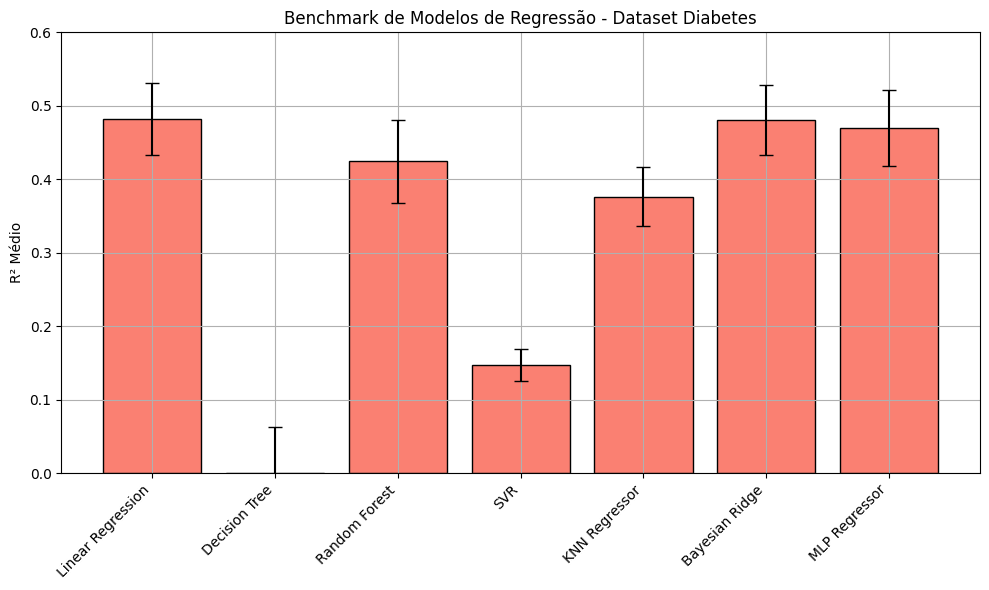

In [9]:
modelos = list(cv_results.keys())
medias = [cv_results[m][0] for m in modelos]
desvios = [cv_results[m][1] for m in modelos]

plt.figure(figsize=(10, 6))
plt.bar(modelos, medias, yerr=desvios, capsize=5, color='salmon', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R² Médio')
plt.title('Benchmark de Modelos de Regressão - Dataset Diabetes')
plt.ylim(0.0, 0.6)
plt.grid(True)
plt.tight_layout()
plt.show()
